[SVM](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

In [2]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('BankNote_Authentication.csv')

X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


from sklearn.svm import SVC
svm_class = SVC(kernel = 'linear', random_state = 42)
svm_class.fit(X_train, y_train)


pred_test = svm_class.predict(X_test)

from sklearn.metrics import accuracy_score

test_accu = accuracy_score(y_test, pred_test)
print(test_accu)

0.8746355685131195


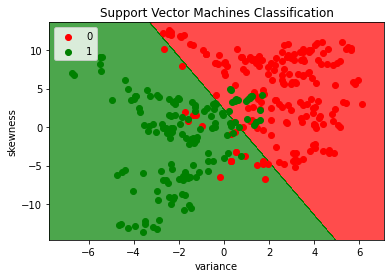

In [3]:
from matplotlib.colors import ListedColormap
import numpy as np
#Define Variables
clf = svm_class
h = 0.01
X_plot, z_plot = X_test, y_test

#Standard Template to draw graph
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['red', 'green'][i], cmap = ListedColormap(('red', 'green')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Support Vector Machines Classification')
plt.xlabel('variance')
plt.ylabel('skewness')
plt.legend()

plt.show()

### Kernel SVM

Every kernel has different way to transforming data into higher dimension. Example, Linear, Ploynomial, RBF, Sigmoid etc.

0.9271137026239067


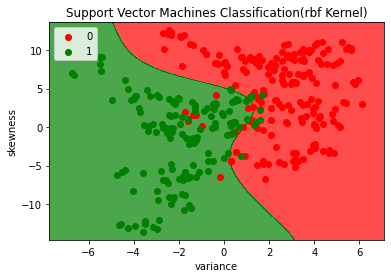

In [4]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('BankNote_Authentication.csv')

X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.svm import SVC
svm_ker = SVC(kernel = 'rbf', random_state = 42)#Non-linear kernel
svm_ker.fit(X_train, y_train)

pred_test = svm_ker.predict(X_test)

from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, pred_test)
print(test_acc)


from matplotlib.colors import ListedColormap
import numpy as np
#Define Variables
clf = svm_ker
h = 0.01
X_plot, z_plot = X_test, y_test

#Standard Template to draw graph
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['red', 'green'][i], cmap = ListedColormap(('red', 'green')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Support Vector Machines Classification(rbf Kernel)')
plt.xlabel('variance')
plt.ylabel('skewness')
plt.legend()

plt.show()

### Support Vector Regression

0.9420909567367098


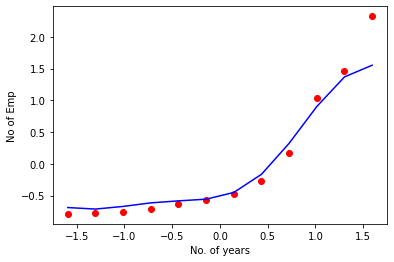

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Company_Performance.csv')
X = dataset.iloc[:, 0:1].values.astype(float)
y = dataset.iloc[:, 1:2].values.astype(float)

from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
ss_y = StandardScaler()

X = ss_X.fit_transform(X)
y = ss_y.fit_transform(y)

#SVR
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')#Non-linear
svr.fit(X, y.ravel()) 

#predict
y_pred = svr.predict(ss_X.transform(np.array([[7.5]])))
y_pred = ss_y.inverse_transform(y_pred)

print(svr.score(X, y))

#Visualization
plt.scatter(X, y, color = 'red')
plt.plot(X, svr.predict(X), color = 'blue')
plt.ylabel('No of Emp')
plt.xlabel('No. of years')
plt.show()